# 이항분포
이항분포(Binomial Distribution)는 ```고정된 횟수의 독립적인 시도(trial)```에서 각 시도마다 동일한 성공 확률 𝑝 를 가질 때, 성공 횟수를 나타내는 이산 확률분포입니다. 예를 들어, 동전을 10번 던졌을 때 앞면이 나오는 횟수를 모델링하는 데 이항분포를 사용할 수 있습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import koreanize_matplotlib

In [15]:
# 이항분포 - binom.pmf

(1, 10, 0.5)  # 10번 중 1번 앞면이 나올 확률.

# <앞면횟수, 총시행횟수, 앞면의 확률> 순으로 

0.009765625000000002

In [13]:
n = 10
p = 0.5

values = np.arange(n+1)        # array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

binom.pmf(values, n, p)       # 각 횟수에 대한 확률값 구할 수 있음

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

In [10]:
idx = 0
for i in binom.pmf(values, n, p):
    print(f"앞면이 {idx}번 나올 확률 : {i * 100:.2f}%")
    idx += 1

앞면이 0번 나올 확률 : 0.10%
앞면이 1번 나올 확률 : 0.98%
앞면이 2번 나올 확률 : 4.39%
앞면이 3번 나올 확률 : 11.72%
앞면이 4번 나올 확률 : 20.51%
앞면이 5번 나올 확률 : 24.61%
앞면이 6번 나올 확률 : 20.51%
앞면이 7번 나올 확률 : 11.72%
앞면이 8번 나올 확률 : 4.39%
앞면이 9번 나올 확률 : 0.98%
앞면이 10번 나올 확률 : 0.10%


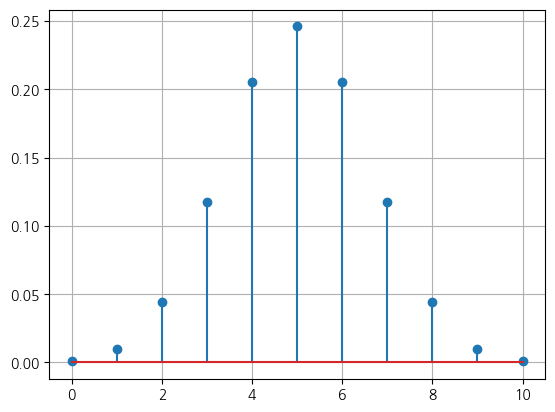

In [16]:
# 이항분포 시각화 - plt.stem

ps = binom.pmf(values, n, p)

plt.stem(ps)
plt.grid()
plt.show()

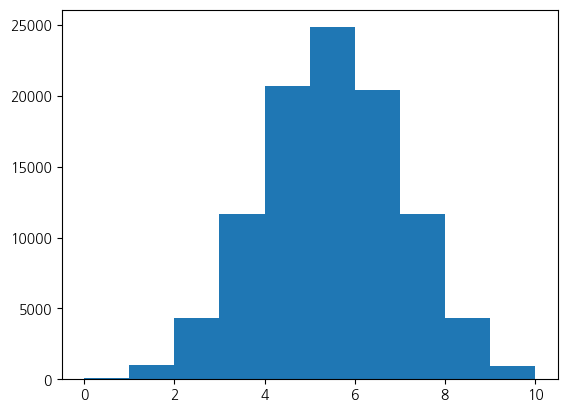

In [19]:
# 이항분포 시뮬레이션. 랜덤으로  -  np.random.binomial

n = 10
p = 0.5
samples = 100000

box = np.random.binomial(n, p, samples)
box

plt.hist(box)
plt.show()

# <앞면횟수, 앞면의 확률, 시뮬레이션 수> 순으로 

In [25]:
# 누적 확률 분포 - binom.cdf

n = 10
p = 0.5
values = np.arange(11)

ps = binom.cdf(values, n, p)
ps

array([9.76562500e-04, 1.07421875e-02, 5.46875000e-02, 1.71875000e-01,
       3.76953125e-01, 6.23046875e-01, 8.28125000e-01, 9.45312500e-01,
       9.89257812e-01, 9.99023438e-01, 1.00000000e+00])

In [26]:
idx = 0
for i in ps:
    print(f"앞면이 {idx}번 이하로 나올 확률 : {i * 100:.2f}%")
    idx += 1

앞면이 0번 이하로 나올 확률 : 0.10%
앞면이 1번 이하로 나올 확률 : 1.07%
앞면이 2번 이하로 나올 확률 : 5.47%
앞면이 3번 이하로 나올 확률 : 17.19%
앞면이 4번 이하로 나올 확률 : 37.70%
앞면이 5번 이하로 나올 확률 : 62.30%
앞면이 6번 이하로 나올 확률 : 82.81%
앞면이 7번 이하로 나올 확률 : 94.53%
앞면이 8번 이하로 나올 확률 : 98.93%
앞면이 9번 이하로 나올 확률 : 99.90%
앞면이 10번 이하로 나올 확률 : 100.00%


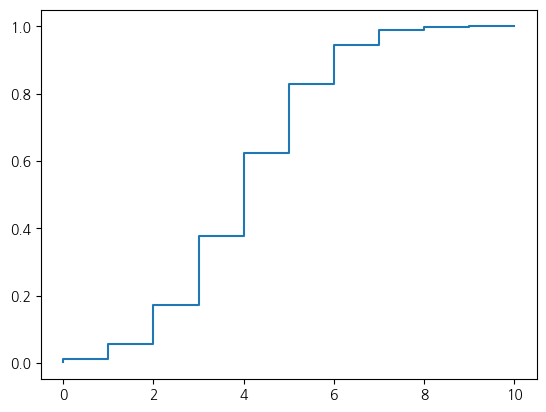

In [28]:
# 이항분포 cdf 시각화 - plt.step 

plt.step(values, ps)
plt.show()

## 연습문제
1. 동전을 20번 던졌을 때, 앞면이 정확히 12번 나올 확률을 구하시오.

In [29]:
binom.pmf(12, 20, 0.5)

0.12013435363769538

2. 한 공장에서 생산되는 제품의 결함률이 0.02일 때, 100개의 제품을 검사하여 결함이 5개 이상일 확률을 구하시오.

In [47]:
1 - binom.cdf(4, 100, 0.02)

# 결함이 5개 이상 = 1 - (결함이 4개 이하)

0.05083044536950032

3. 객관식 시험에서 각 문제는 4지선다형으로, 무작위로 답을 선택하면 정답을 맞출 확률은 0.25이다. 10문제 중 정확히 3문제만 맞출 확률을 구하시오.

In [32]:
binom.pmf(3, 10, 0.25)

0.2502822875976561

4. 신약의 효과가 있을 확률이 0.7일 때, 15명의 환자 중 효과를 보이는 환자가 10명 이상일 확률을 구하시오.

In [48]:
1 - binom.cdf(9, 15, 0.7)

# 환자가 10명 이상 = 1 - (9명 이하)

0.7216214402043639

5. 어떤 선거에서 유권자의 60%가 후보 A에게 투표한다고 가정할 때, 50명의 유권자를 무작위로 샘플링하여 35명 이상이 후보 A에게 투표할 확률을 구하시오.

In [40]:
1 - binom.cdf(34, 50, 0.6)

# 35명 이상이 투표 = 1 - (34명 이하) 

0.053955034878514274

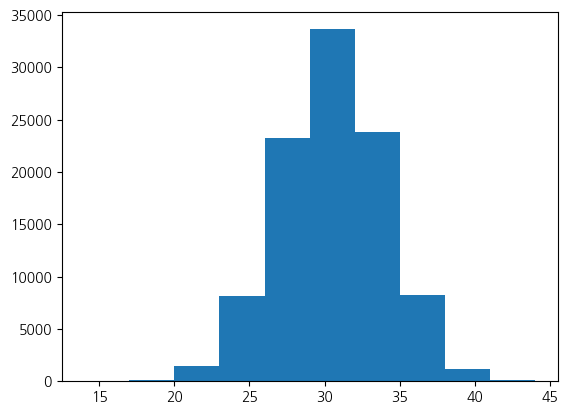

In [46]:
# (+)
box = np.random.binomial(50, 0.6, 100000)
box

plt.hist(box)
plt.show()